In [12]:
# 9

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
import numpy as np

df=pd.read_csv('loan.csv')
print("Initial DataFrame : ")
print(df.head())

df['log_ApplicantIncome']=np.log(df['ApplicantIncome'])

df['sqrt_LoanAmount']=np.sqrt(df['LoanAmount'])
print("*******************************************")
print(df.head())

Initial DataFrame : 
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  

In [16]:
X=df.drop(['Loan_ID','Loan_Status','Dependents','Loan_Amount_Term','Credit_History'],axis=1)
y=df['Loan_Status']

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

print("Training Set : ")
print(X_train.head())
print("\nTesting Set : ")
print(X_test.head())

Training Set : 
    Gender Married Education Self_Employed  ApplicantIncome  \
83    Male     Yes  Graduate            No             6000   
90    Male     Yes  Graduate            No             2958   
227   Male     Yes  Graduate            No             6250   
482   Male     Yes  Graduate            No             2083   
464   Male      No  Graduate            No             4166   

     CoapplicantIncome  LoanAmount Property_Area  log_ApplicantIncome  \
83              2250.0       265.0     Semiurban             8.699515   
90              2900.0       131.0     Semiurban             7.992269   
227             1695.0       210.0     Semiurban             8.740337   
482             3150.0       128.0     Semiurban             7.641564   
464                0.0        98.0     Semiurban             8.334712   

     sqrt_LoanAmount  
83         16.278821  
90         11.445523  
227        14.491377  
482        11.313708  
464         9.899495  

Testing Set : 
     Gender 

In [5]:
# 10

import pandas as pd
import numpy as np
from scipy import stats

df=pd.read_csv('house.csv')
m1=df['price'].mean()
m2=df['price'].median()
m3=df['price'].mode()[0]
std=df['price'].std()
var=df['price'].var()
print("Mean : ",m1,"\nMedian : ",m2,"\nMode : ",m3,"\nStandard Deviation : ",std,"\nVariance : ",var)

# hypotheses
ac=df[df['airconditioning']=='yes']['price']
non_ac=df[df['airconditioning']=='no']['price']
ts,pv= stats.ttest_ind(ac,non_ac)
print("Hypothesis Testing : ")
print("T-statistic : ",ts)
print("P-Value : ",pv)

alpha=0.05
if p_value<alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis")

# Confidence interval
cl=0.95 #confidence level
stde=stats.sem(df['price']) #standord error of mean
me=stde*stats.t.ppf((1+cl)/2,len(df['price'])-1)  # me = margin of error
ci=(m1-me,m1+me)
print("Confidence Interval : ")
print(cl*100,"% ci for the mean house price : ",ci)

Mean :  4766729.247706422 
Median :  4340000.0 
Mode :  3500000 
Standard Deviation :  1870439.615657394 
Variance :  3498544355820.5796
Hypothesis Testing : 
T-statistic :  11.839033782035843
P-Value :  6.310969853530074e-29
Reject the null hypothesis.
Confidence Interval : 
95.0 % ci for the mean house price :  (4609345.1502212, 4924113.345191644)


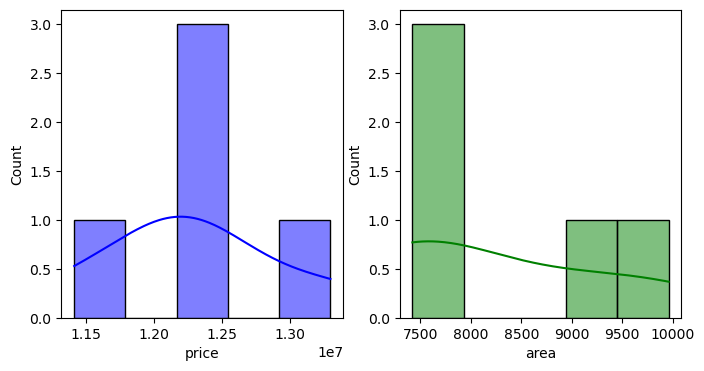

In [5]:
# 11

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

a={
    'price':[13300000,12250000,12250000,12215000,11410000],
    'area':[7420,8960,9960,7500,7420]
}
df=pd.DataFrame(a)
fig,axs=plt.subplots(1,2,figsize=(8,4))

sns.histplot(df['price'],bins=5,kde=True,color='blue',ax=axs[0])

sns.histplot(df['area'],bins=5,kde=True,color='green',ax=axs[1])
plt.show()

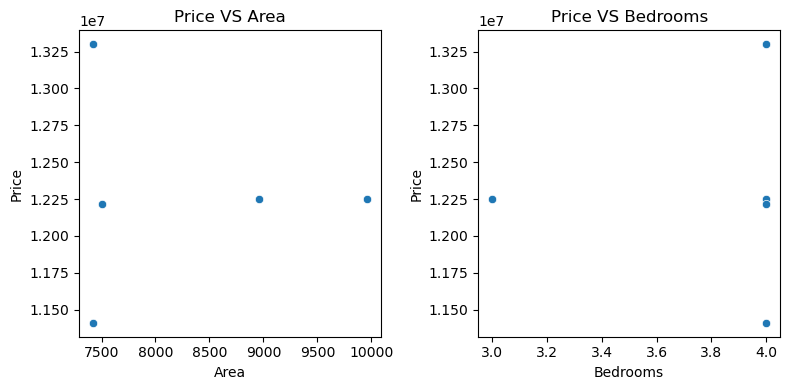

In [3]:
# 1 (12)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
b={ 'price':[13300000,12250000,12250000,12215000,11410000],
    'area':[7420,8960,9960,7500,7420],
    'bedrooms':[4,4,3,4,4]}
df=pd.DataFrame(b)
fig,axs=plt.subplots(1,2,figsize=(8,4))

sns.scatterplot(x='area',y='price',data=df,ax=axs[0])
axs[0].set_title('Price VS Area')
axs[0].set_xlabel('Area')
axs[0].set_ylabel('Price')
sns.scatterplot(x='bedrooms',y='price',data=df,ax=axs[1])
axs[1].set_title('Price VS Bedrooms')
axs[1].set_xlabel('Bedrooms')
axs[1].set_ylabel('Price')
plt.tight_layout()
plt.show()

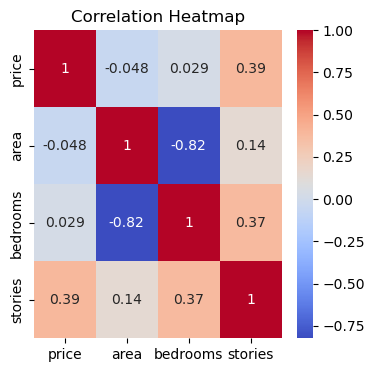

In [11]:
# 13
import matplotlib.pyplot as plt
import seaborn as sns
c={ 'price':[13300000,12250000,12250000,12215000,11410000],
    'area':[7420,8960,9960,7500,7420],
    'bedrooms':[4,4,3,4,4],
    'stories':[3,4,2,2,2]}
df=pd.DataFrame(c)
plt.figure(figsize=(4,4))
corr_matrix=df[['price','area','bedrooms','stories']].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

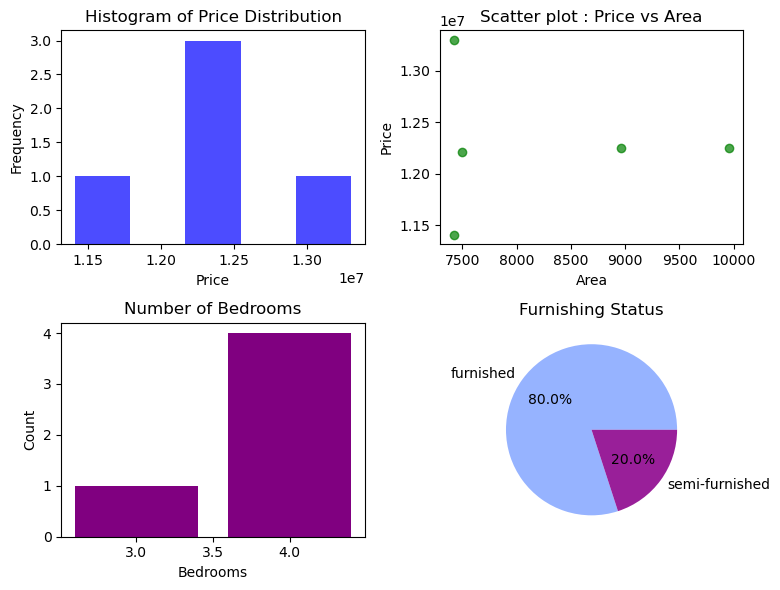

In [7]:
# 14

d={ 'price':[13300000,12250000,12250000,12215000,11410000],
    'area':[7420,8960,9960,7500,7420],
    'bedrooms':[4,4,3,4,4],
    'furnishingstatus':['furnished','furnished','semi-furnished','furnished','furnished']}
df=pd.DataFrame(d)
fig,axs=plt.subplots(2,2,figsize=(8,6))
axs[0,0].hist(df['price'],bins=5,color='blue',alpha=0.7)
axs[0,0].set_title('Histogram of Price Distribution')
axs[0,0].set_xlabel('Price')
axs[0,0].set_ylabel('Frequency')

axs[0,1].scatter(df['area'],df['price'],color='green',marker='o',alpha=0.7)
axs[0,1].set_title('Scatter plot : Price vs Area')
axs[0,1].set_xlabel('Area')
axs[0,1].set_ylabel('Price')

bcount=df['bedrooms'].value_counts()
axs[1,0].bar(bcount.index,bcount.values,color='purple')
axs[1,0].set_title('Number of Bedrooms')
axs[1,0].set_xlabel('Bedrooms')
axs[1,0].set_ylabel('Count')

fcount=df['furnishingstatus'].value_counts()
axs[1,1].pie(fcount,labels=fcount.index,autopct='%1.1f%%',colors=['#96b3ff','#991f99'])
axs[1,1].set_title('Furnishing Status')
plt.tight_layout()
plt.show()

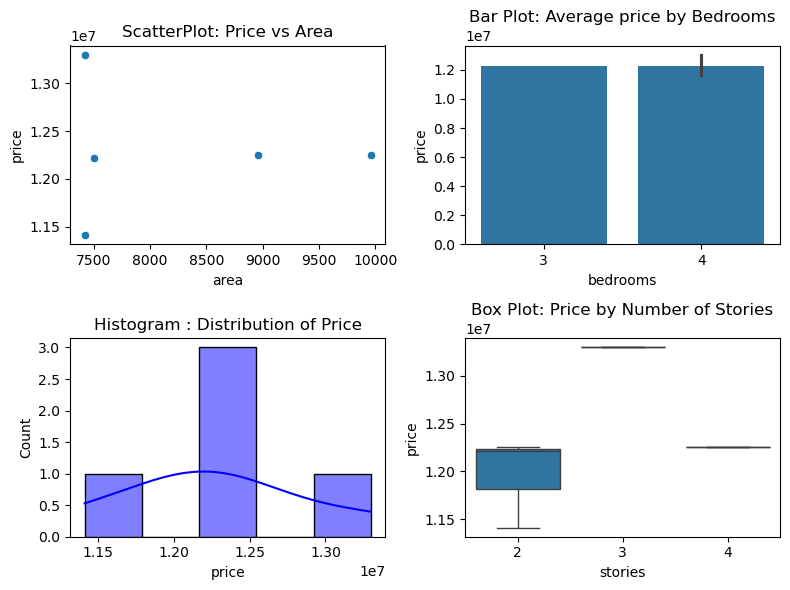

In [11]:
#15

c={ 'price':[13300000,12250000,12250000,12215000,11410000],
    'area':[7420,8960,9960,7500,7420],
    'bedrooms':[4,4,3,4,4],
    'stories':[3,4,2,2,2]}
df=pd.DataFrame(c)
fig,axs=plt.subplots(2,2,figsize=(8,6))
sns.scatterplot(x='area',y='price',data=df,ax=axs[0,0])
axs[0,0].set_title('ScatterPlot: Price vs Area') 

sns.barplot(x='bedrooms',y='price',data=df,ax=axs[0,1])
axs[0,1].set_title('Bar Plot: Average price by Bedrooms') 

sns.histplot(df['price'],bins=5,kde=True,color='blue',ax=axs[1,0])
axs[1,0].set_title('Histogram : Distribution of Price')

sns.boxplot(x='stories',y='price',data=df,ax=axs[1,1])
axs[1,1].set_title('Box Plot: Price by Number of Stories')
plt.tight_layout()
plt.show()